In [1]:
import illustris_python as il
import snapshot as sn
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [2]:
basePath = '../sims.TNG/TNG300-1/output/'

In [3]:
h = 0.6774
SnapNum = 99
z = 0
a = 1 / (1 + z)

In [4]:
header = il.groupcat.loadHeader(basePath, SnapNum)

In [5]:
total_halos = header['Ngroups_Total']

In [6]:
# random.seed(10) # To generate the same value everytime
# haloID = random.randint(0, total_halos)
haloID = 0 # Safety check

In [7]:
haloID

0

In [8]:
halo_data = il.groupcat.loadSingle(basePath, SnapNum, haloID)

In [9]:
halo_pos = halo_data['GroupPos']

In [10]:
halo_pos

array([ 43718.812,  48813.64 , 147594.95 ], dtype=float32)

In [11]:
halo_data['GroupLenType']

array([31423633, 41857423,        0,        0,  3787731,      526],
      dtype=int32)

In [12]:
fields_h = ['Coordinates']
part_type = [0, 1, 4, 5]

In [13]:
if halo_data['GroupLenType'][part_type[0]] != 0:
    part0_data = np.zeros((halo_data['GroupLenType'][part_type[0]], 3))
    part0_data = sn.loadHalo(basePath, SnapNum, haloID, part_type[0], fields=fields_h)
    dist0_data = np.linalg.norm(part0_data - halo_pos, axis=1)
if halo_data['GroupLenType'][part_type[1]] != 0:
    part1_data = np.zeros((halo_data['GroupLenType'][part_type[1]], 3))
    part1_data = sn.loadHalo(basePath, SnapNum, haloID, part_type[1], fields=fields_h)
    dist1_data = np.linalg.norm(part1_data - halo_pos, axis=1)
if halo_data['GroupLenType'][part_type[2]] != 0:
    part4_data = np.zeros((halo_data['GroupLenType'][part_type[2]], 3))
    part4_data = sn.loadHalo(basePath, SnapNum, haloID, part_type[2], fields=fields_h)
    dist4_data = np.linalg.norm(part4_data - halo_pos, axis=1)
if halo_data['GroupLenType'][part_type[3]] != 0:
    part5_data = np.zeros((halo_data['GroupLenType'][part_type[3]], 3))
    part5_data = sn.loadHalo(basePath, SnapNum, haloID, part_type[3], fields=fields_h)
    dist5_data = np.linalg.norm(part5_data - halo_pos, axis=1)

To check if the function np.lingalg.norm is working as expected

In [14]:
dist0_data[0] == math.sqrt((part0_data[0, 0] - halo_pos[0]) ** 2 + (part0_data[0, 1] - halo_pos[1]) ** 2 + (part0_data[0, 2] - halo_pos[2]) ** 2)

True

In [15]:
bins = 200

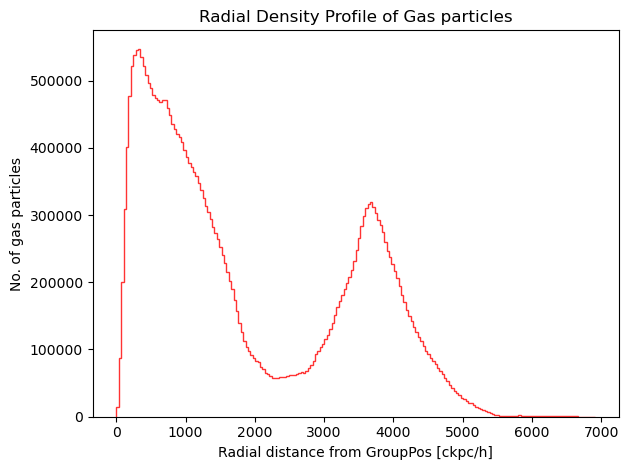

In [16]:
if halo_data['GroupLenType'][part_type[0]] != 0:
    fig, ax = plt.subplots()
    ax.hist(dist0_data, bins, histtype='step', color='red', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax.set_xlabel('Radial distance from GroupPos [ckpc/h]')
    ax.set_ylabel('No. of gas particles')
    ax.set_title('Radial Density Profile of Gas particles')
    plt.tight_layout()
    plt.show()
else:
    print("No gas particles in this halo")

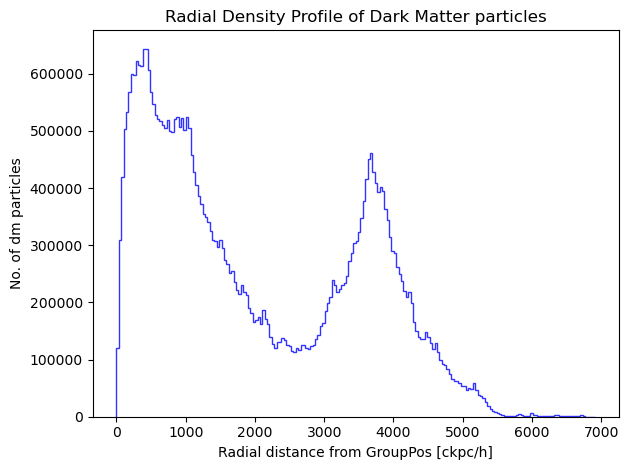

In [17]:
if halo_data['GroupLenType'][part_type[1]] != 0:
    fig, ax = plt.subplots()
    ax.hist(dist1_data, bins, histtype='step', color='blue', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax.set_xlabel('Radial distance from GroupPos [ckpc/h]')
    ax.set_ylabel('No. of dm particles')
    ax.set_title('Radial Density Profile of Dark Matter particles')
    plt.tight_layout()
    plt.show()
else:
    print("No dark matter particles in this halo")

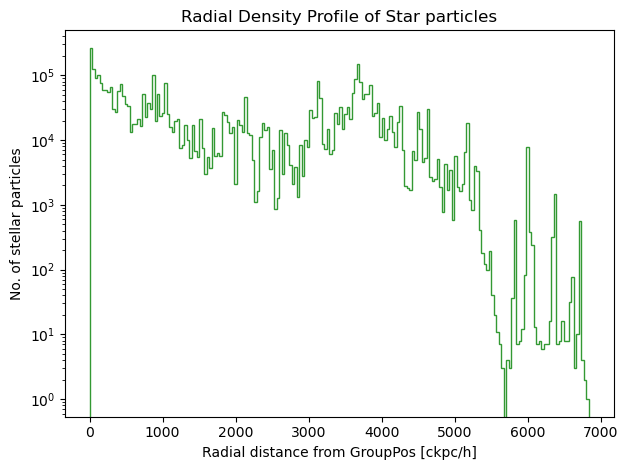

In [18]:
if halo_data['GroupLenType'][part_type[2]] != 0:
    fig, ax = plt.subplots()
    ax.hist(dist4_data, bins, histtype='step', color='green', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax.set_xlabel('Radial distance from GroupPos [ckpc/h]')
    ax.set_ylabel('No. of stellar particles')
    # ax.set_yscale('log')
    ax.set_title('Radial Density Profile of Star particles')
    plt.tight_layout()
    plt.show()
else:
    print("No star particles in this halo")

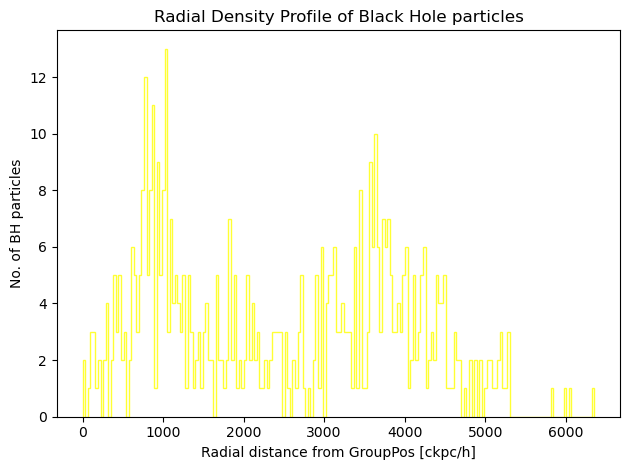

In [19]:
if halo_data['GroupLenType'][part_type[3]] != 0:
    fig, ax = plt.subplots()
    ax.hist(dist5_data, bins, histtype='step', color='yellow', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax.set_xlabel('Radial distance from GroupPos [ckpc/h]')
    ax.set_ylabel('No. of BH particles')
    ax.set_title('Radial Density Profile of Black Hole particles')
    plt.tight_layout()
    plt.show()
else:
    print("No black hole particles in this halo")

Here, the GroupPos of the chosen halo has been taken as origin to calculate the radial distance. Now, let us try using GroupCM as the origin and try to see if there is any difference in the density profiles.

In [20]:
halo_cm = halo_data['GroupCM']

In [21]:
if halo_data['GroupLenType'][part_type[0]] != 0:
    part0data = np.zeros((halo_data['GroupLenType'][part_type[0]], 3))
    part0data = sn.loadHalo(basePath, SnapNum, haloID, part_type[0], fields=fields_h)
    dist0data = np.linalg.norm(part0_data - halo_cm, axis=1)
if halo_data['GroupLenType'][part_type[1]] != 0:
    part1data = np.zeros((halo_data['GroupLenType'][part_type[1]], 3))
    part1data = sn.loadHalo(basePath, SnapNum, haloID, part_type[1], fields=fields_h)
    dist1data = np.linalg.norm(part1_data - halo_cm, axis=1)
if halo_data['GroupLenType'][part_type[2]] != 0:
    part4data = np.zeros((halo_data['GroupLenType'][part_type[2]], 3))
    part4data = sn.loadHalo(basePath, SnapNum, haloID, part_type[2], fields=fields_h)
    dist4data = np.linalg.norm(part4_data - halo_cm, axis=1)
if halo_data['GroupLenType'][part_type[3]] != 0:
    part5data = np.zeros((halo_data['GroupLenType'][part_type[3]], 3))
    part5data = sn.loadHalo(basePath, SnapNum, haloID, part_type[3], fields=fields_h)
    dist5data = np.linalg.norm(part5_data - halo_cm, axis=1)

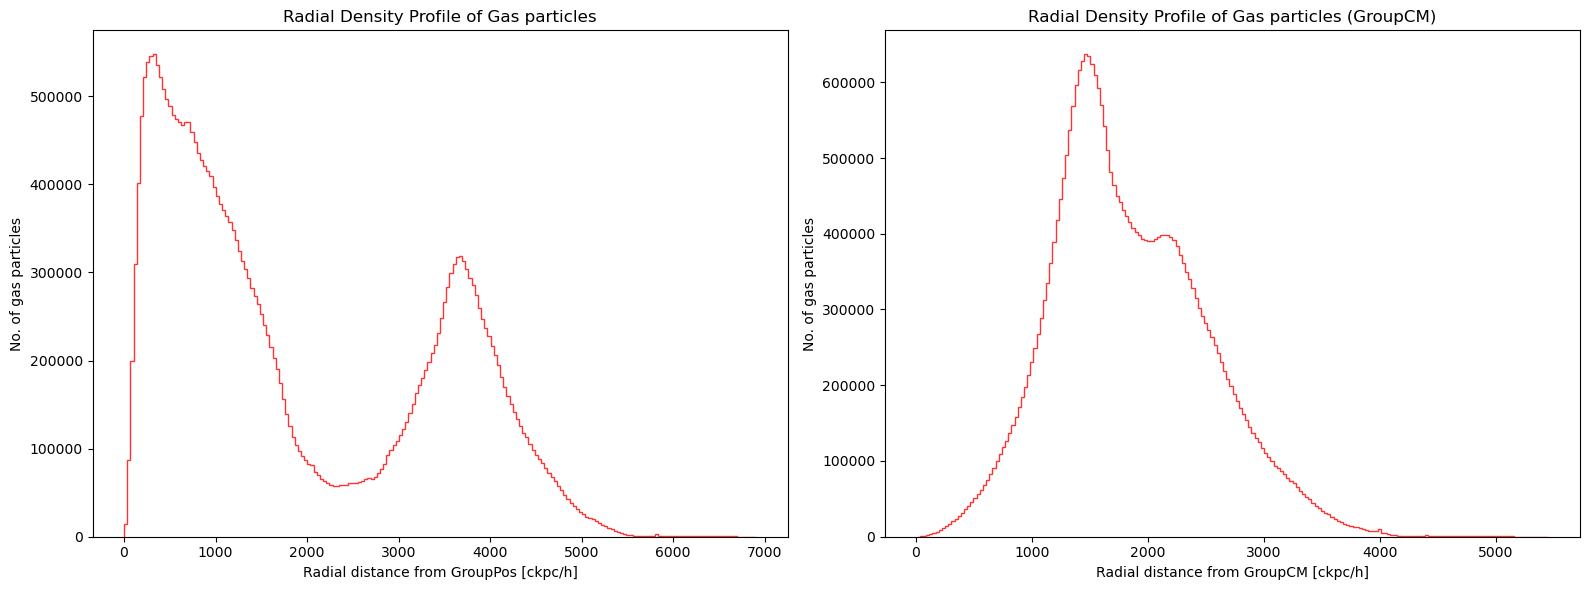

In [22]:
if halo_data['GroupLenType'][part_type[0]] != 0:
    fig = plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(121)
    ax1.hist(dist0_data, bins, histtype='step', color='red', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax1.set_xlabel('Radial distance from GroupPos [ckpc/h]')
    ax1.set_ylabel('No. of gas particles')
    ax1.set_title('Radial Density Profile of Gas particles')
    ax2 = plt.subplot(122)
    ax2.hist(dist0data, bins, histtype='step', color='red', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax2.set_xlabel('Radial distance from GroupCM [ckpc/h]')
    ax2.set_ylabel('No. of gas particles')
    ax2.set_title('Radial Density Profile of Gas particles (GroupCM)')
    plt.tight_layout()
    plt.savefig('Ex9a.png')
    plt.show()
else:
    print("No gas particles in this halo")

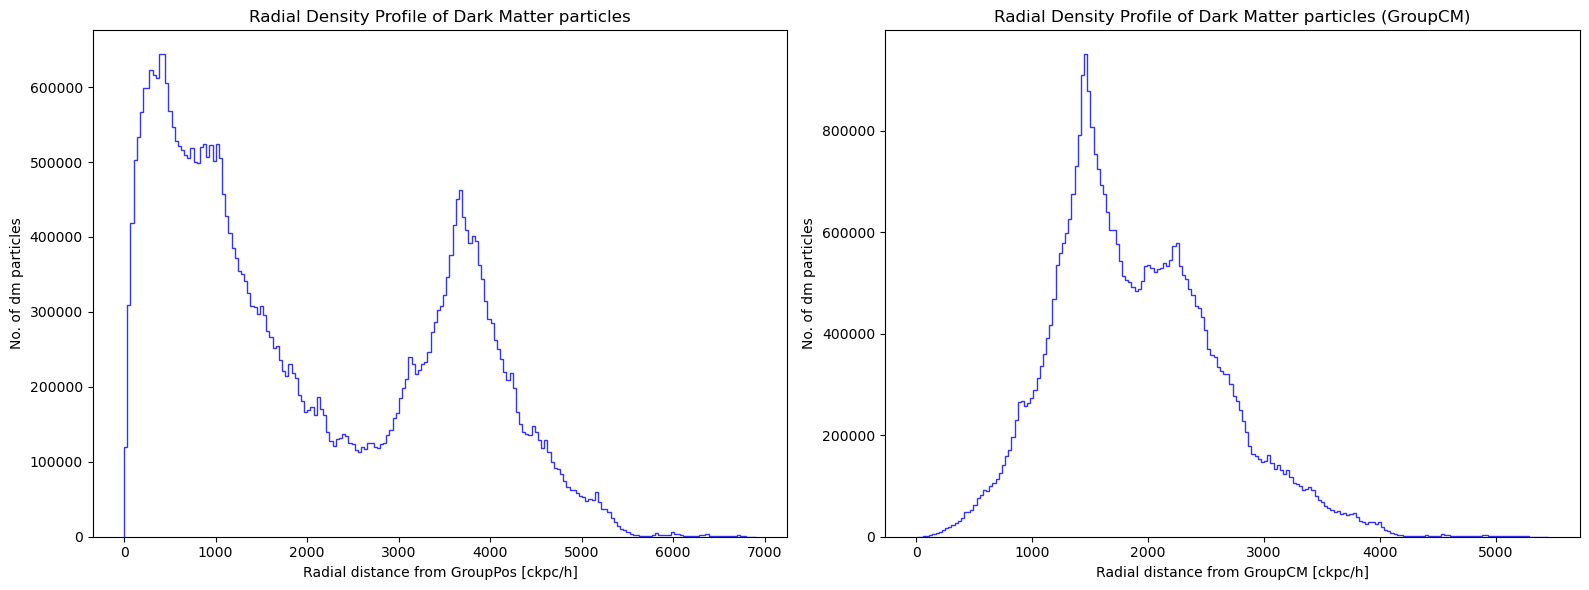

In [23]:
if halo_data['GroupLenType'][part_type[1]] != 0:
    fig = plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(121)
    ax1.hist(dist1_data, bins, histtype='step', color='blue', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax1.set_xlabel('Radial distance from GroupPos [ckpc/h]')
    ax1.set_ylabel('No. of dm particles')
    ax1.set_title('Radial Density Profile of Dark Matter particles')
    ax2 = plt.subplot(122)
    ax2.hist(dist1data, bins, histtype='step', color='blue', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax2.set_xlabel('Radial distance from GroupCM [ckpc/h]')
    ax2.set_ylabel('No. of dm particles')
    ax2.set_title('Radial Density Profile of Dark Matter particles (GroupCM)')
    plt.tight_layout()
    plt.savefig('Ex9b.png')
    plt.show()
else:
    print("No dark matter particles in this halo")

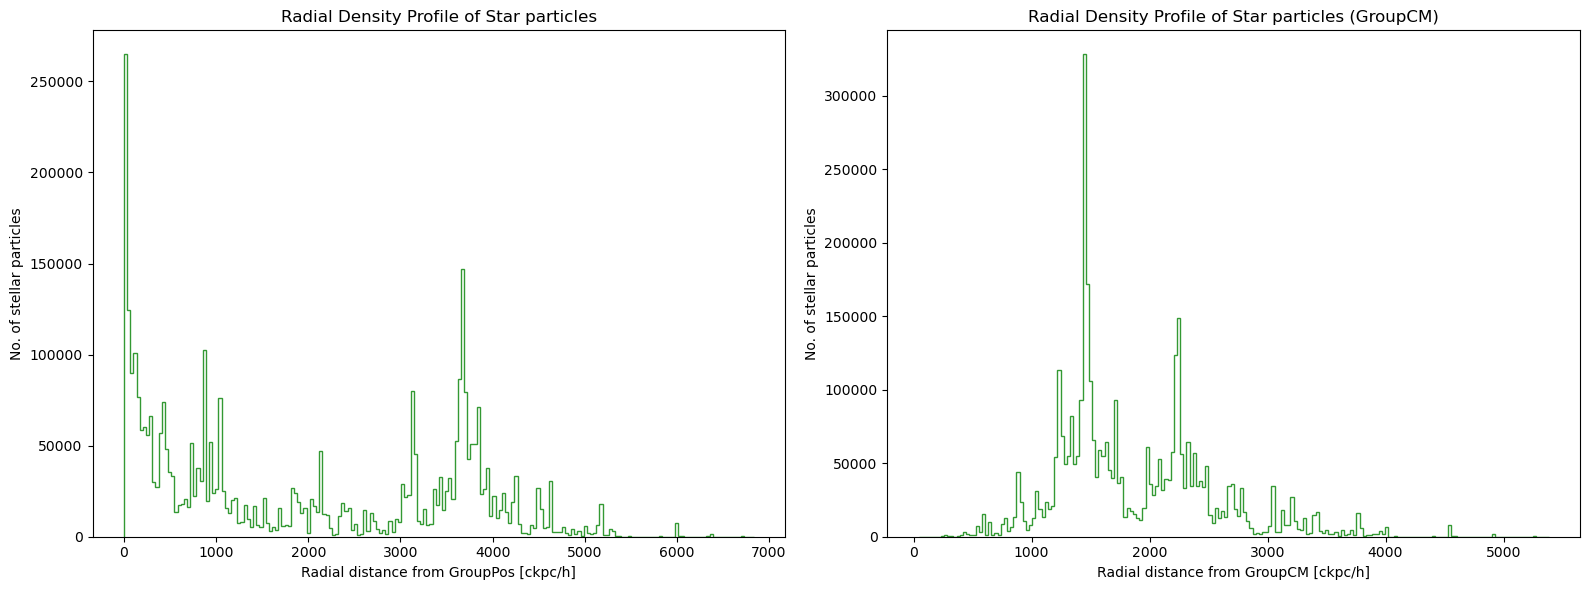

In [24]:
if halo_data['GroupLenType'][part_type[2]] != 0:
    fig = plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(121)
    ax1.hist(dist4_data, bins, histtype='step', color='green', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax1.set_xlabel('Radial distance from GroupPos [ckpc/h]')
    ax1.set_ylabel('No. of stellar particles')
    ax1.set_title('Radial Density Profile of Star particles')
    ax2 = plt.subplot(122)
    ax2.hist(dist4data, bins, histtype='step', color='green', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax2.set_xlabel('Radial distance from GroupCM [ckpc/h]')
    ax2.set_ylabel('No. of stellar particles')
    ax2.set_title('Radial Density Profile of Star particles (GroupCM)')
    plt.tight_layout()
    plt.savefig('Ex9c.png')
    plt.show()
else:
    print("No star particles in this halo")

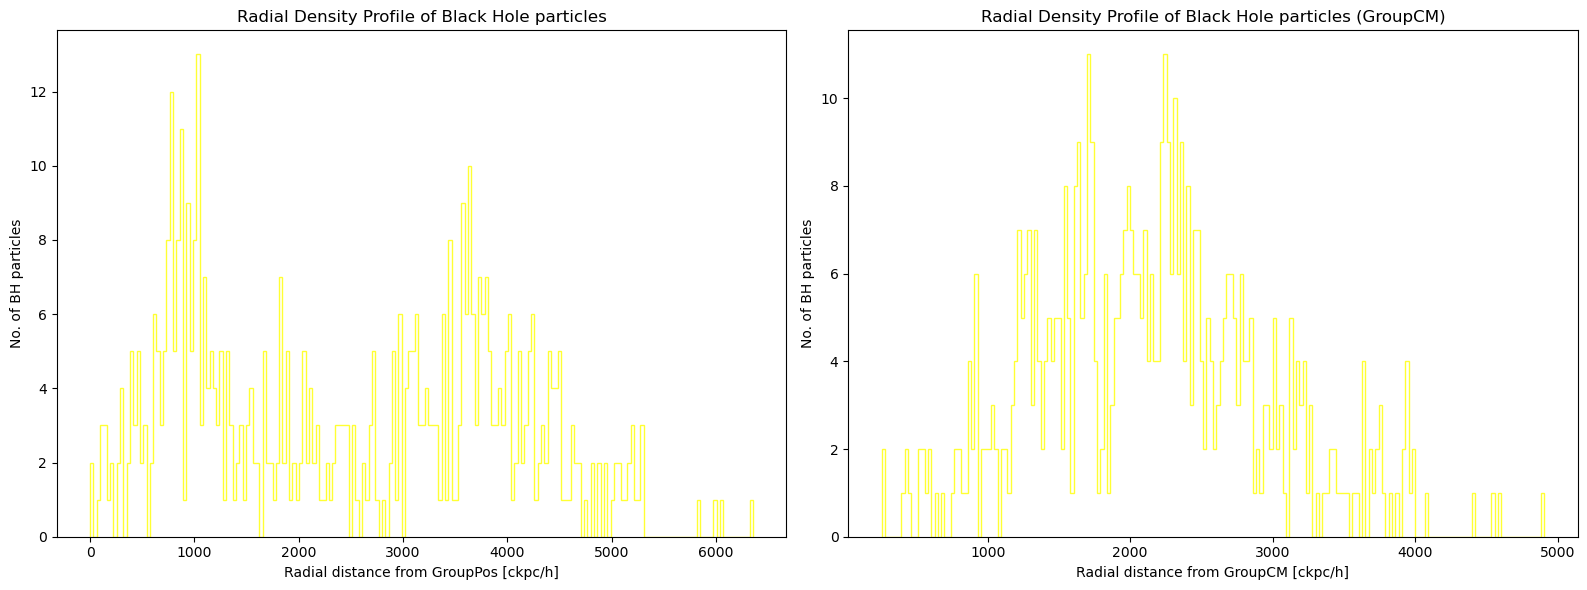

In [25]:
if halo_data['GroupLenType'][part_type[3]] != 0:
    fig = plt.figure(figsize=(16, 6))
    ax1 = plt.subplot(121)
    ax1.hist(dist5_data, bins, histtype='step', color='yellow', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax1.set_xlabel('Radial distance from GroupPos [ckpc/h]')
    ax1.set_ylabel('No. of BH particles')
    ax1.set_title('Radial Density Profile of Black Hole particles')
    ax2 = plt.subplot(122)
    ax2.hist(dist5data, bins, histtype='step', color='yellow', alpha=0.8)
    # ax.set_yscale('log') # Use if number of particles is large
    ax2.set_xlabel('Radial distance from GroupCM [ckpc/h]')
    ax2.set_ylabel('No. of BH particles')
    ax2.set_title('Radial Density Profile of Black Hole particles (GroupCM)')
    plt.tight_layout()
    plt.savefig('Ex9d.png')
    plt.show()
else:
    print("No black hole particles in this halo")